## COMP257 Data Science Portfolio Part 2
### Student Name: Justin Lam 
### Student ID: 45197083


### Import Relevent Packages

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pylab as plt
from datetime import date
from datetime import timedelta
%matplotlib inline

### Loading the data

In [2]:
df = pd.read_csv('energydata_complete.csv')
df.head() 

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Expoloratary Data Analysis - EDA

1)  Data Type For Each Attribute. From the output below, it shows that most of the data are 'float64 - floating point' while appliances and lights are interger and finally the data is an object. It is important to find out the data type of attributes as we may need to convert some of the data to perform linear/logistic regression. 

In [3]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

From the output above, it shows most of the datatype of variables are float64 and Appliances and lights are intergers. Additionally, we also noticed that date is object therefore we may need to use a command to convert the date into a time series. 

2) Use the commend .describe() to obtain the descriptive statistics of the data. This includes the count, mean, standard deviation, minimum/maximum and the quartiles. 

Descriptive Statistics for temperature. 

In [4]:
dftemp = df[['T1','T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
dftemp.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000


Descriptive Statistics for humanlity. 

In [5]:
dfhum = df[['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']]
dfhum.describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667


Desriptive Statistics for Weather. 

In [6]:
dfwea = df[['T_out', 'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']]
dfwea.describe()

,T_out,Press_mm_hg,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,7.411665,755.522602,4.039752,38.330834,3.760707,24.988033,24.988033
std,5.317409,7.399441,2.451221,11.794719,4.194648,14.496634,14.496634
min,-5.000000,729.300000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,3.666667,750.933333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,6.916667,756.100000,3.666667,40.000000,3.433333,24.897653,24.897653
75%,10.408333,760.933333,5.500000,40.000000,6.566667,37.583769,37.583769
max,26.100000,772.300000,14.000000,66.000000,15.500000,49.996530,49.996530


3) We can also conduct correlation coefficients to find out the relationship between variables. This can be achieved by using the .corr command. 

In [7]:
df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


#### Figure 7:  (Top) Appliances energy consumption measurement for the whole period.  (Bottom) A closer look at the first week of date

The first step is to recreate the date into index - otherwise we cannot create a plot. Recall the first step of EDA, it shows the default datatype of date is an object. 

In [8]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\Justin Lam\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Appliances Wh')

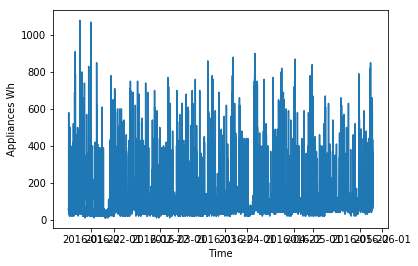

In [9]:
date = df['date']
Appliances = df['Appliances']
plt.plot(date, Appliances)
plt.xlabel('Time')
plt.ylabel('Appliances Wh')

In [17]:
week1 = df[df.index < df.index[0] + timedelta(weeks=1)]
week1.plot(kind = 'line', y = 'Appliances', figsize=(14,5))
plt.suptit('Energy Use in the first week')

TypeError: unsupported operand type(s) for +: 'int' and 'datetime.timedelta'

In [ ]:
fig7b = pd.date_range(start='2016-01-11', end='2016-01-18', freq='D')
date.dtype

####  Fiqure 8: Appliances energy consumption distribution. Top: Histogram shows the frequency of energy consumption in the interval (bar width), and the boxplot shows the location of the median with the black line. 

In [ ]:
bins = 40
plt.hist(df['Appliances'], facecolor='blue', alpha=0.5)
plt.xlabel('Appliances Wh')
plt.ylabel('Frequency')
plt.title('Appliances energy consumption distribution - Histogram')

In [ ]:
df.boxplot(column = 'Appliances', vert=False)
plt.xlabel('Appliances Wh')
plt.title('Appliances energy consumption distribution - Box Plot')

#### Figure 9: Pair plots. Relationship between the energy consumption with lights T1, RH_1, T2, RH_2, T3, RH_3. T1 and RH_1 correspond to the kitchen conditions. T2 and RH_2 correspond to the living room conditions.

In [ ]:
fig9 = df[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']]
sns.pairplot(fig9)

Based on the pairplot in the papaer, it also inculudes the correlation between the variables above however since Python's pariplot does not include correlation. The code will below will conduct correlation.

In [ ]:
fig9.corr()

#### Figure 10: Hourly energy consumption of appliances heat maps for consecutive weeks.

Multiple Regression - Using all the varaibles that is in the complete dataset.

In [ ]:
reg = linear_model.LinearRegression()
x = df[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']]
y = df['Appliances']
reg.fit(x, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

Calculate the residuals

In [ ]:
predicted = reg.predict(x)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

#### Set up RFE (Recursive Feature Elimination) 
- Select all the variables and form an array. 
- Define the X (Independent) and Y (Dependent Variables)
- We manually split the data into training and testing data. Based on the paper, the authors have used 75% of the data as training and 25% to be testing data. 
- Import LinearRegression, RFE and Mean_Squared_Error (MSE) and R^2 as our metrics for regreesion. Both MSE and R^2 will determine how well our model fits. 
- Note that, the complete dataset (energy_completed.csv) is used in this analysis. On the other hand, the authors have used the separate datasets (both training and test) to conduct RFE - as a result there may be a sight variation of the result. 

In [ ]:
feature_cols = np.array(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'])
X = df[feature_cols]
y = df['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score


estimator = LinearRegression()
selector = RFE(estimator, 32) #We asked RFE to select 32 features. 
selector = selector.fit(X, y)

supp = selector.get_support()
print("Selected features:", feature_cols[supp])
print("Coeffs:", selector.estimator_.coef_)
# test the model
predicted = selector.predict(X)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

#### Interpretation of results. 
- Based on the R^2 of the model, it shows that 16.4% of the data are explained by using our data. In other words, regression is prehaps not the best technique to use in this dataset. Additionally, we can also look at the coefficients of the features to determine how RFE ranks them in regards of significance. 

#### Further Regression Analysis - Using Training and Testing Data

In [ ]:
train = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')
train.shape, test.shape

Load both training and testing dataset and check the number of observations. 

In [ ]:
train.info()
train.head()

By looking at the data type of each variables, it shows that variables 'WeekStatus' and 'Day_of_week' are categorical variables.Therefore we might need to convert them into a dummy variable (either 0 for weekday or 1 weekend) to conduct regression analysis for both training data set. 

In [ ]:
train1 = pd.get_dummies(train, columns=['WeekStatus'])
train1.info()

In [ ]:
reg1 = linear_model.LinearRegression()
x_train = train1[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus_Weekday', 'WeekStatus_Weekend']]
y_train = train1['Appliances']
reg1.fit(x_train,y_train)
print("y = x *", reg1.coef_, "+", reg1.intercept_)

In [ ]:
predicted2 = reg1.predict(x_train)
print("MSE:", mean_squared_error(y_train, predicted2))
print("R^2:", r2_score(y_train, predicted2))

We conduct regression by using the testing data (which the variable 'Day of Week'has already been converted in a dummy variable). The indpendent variables of the regression will be of the variables provided while we are using these variables to predict the level of energy consumption of appliances. 

In [ ]:
reg2 = linear_model.LinearRegression()
x_test = test[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus_Weekday', 'WeekStatus_Weekend']]
y_test = test['Appliances']
reg2.fit(x_test,y_test)
print("y = x *", reg2.coef_, "+", reg2.intercept_)

Similarly, we also to conduct the MSE and R^2 of the model. By observing the results, it appears that both of the numbers are similar to the ones in the paper - which is a good sign.

In [ ]:
predicted3 = reg1.predict(x_test)
print("MSE:", mean_squared_error(y_test, predicted3))
print("R^2:", r2_score(y_test, predicted3))